<a href="https://colab.research.google.com/github/cx666321/jiqixuexi/blob/main/test04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k=5时的分类结果：
数据 [[52, 42]] 判定结果: Jindo dog
最近邻距离: [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]]
最近邻索引: [[ 6 14 12 10  8]]



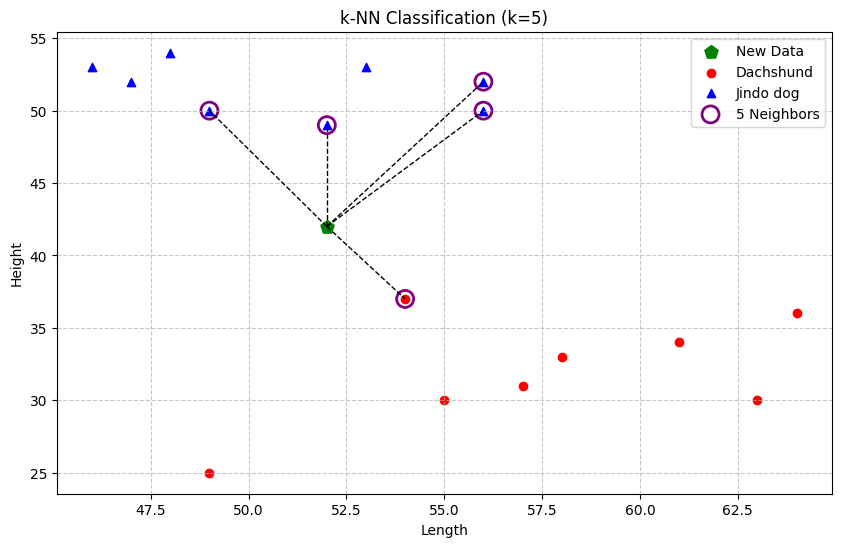

k=9时的分类结果：
数据 [[52, 42]] 判定结果: Jindo dog
最近邻距离: [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961 10.81665383
  11.04536102 11.18033989 12.04159458]]
最近邻索引: [[ 6 14 12 10  8  4 13  9  7]]


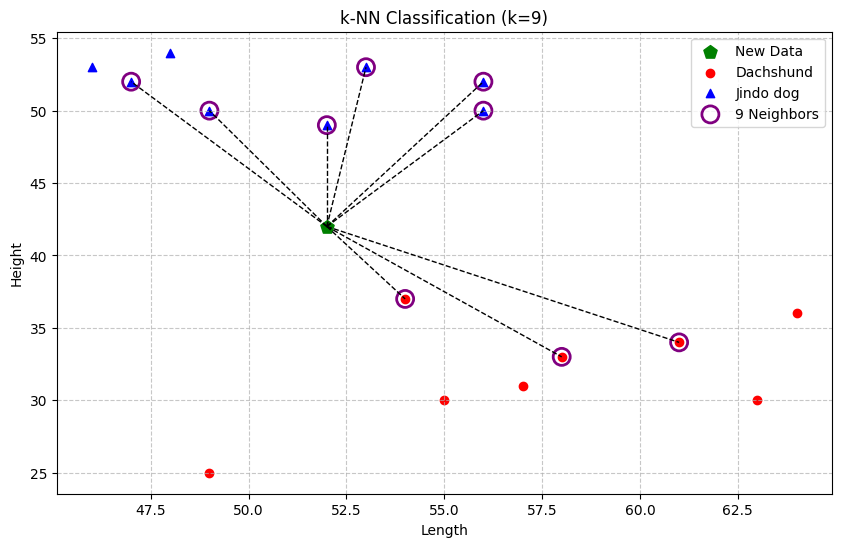

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 数据准备
# 腊肠犬的长度和高度数据
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

# 珍岛犬的长度和高度数据
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

# 数据处理
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))  # 珍岛犬标签为1

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))  # 腊肠犬标签为0

# 合并数据
dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

# 待分类的新数据
newdata = [[52, 42]]
dog_classes = {0: 'Dachshund', 1: 'Jindo dog'}

# 定义绘制邻居点的函数
def draw_neighbor(dogs, indexes, k):
    """绘制k个最近邻点并标记连接线"""
    neighbor_points = dogs[indexes[0]]
    # 绘制邻居点
    plt.scatter(neighbor_points[:, 0], neighbor_points[:, 1],
                s=150, facecolors='none', edgecolors='purple',
                linewidth=2, label=f'{k} Neighbors')
    # 绘制与新数据点的连接线
    for point in neighbor_points:
        plt.plot([newdata[0][0], point[0]], [newdata[0][1], point[1]],
                 'k--', linewidth=1)

# kNN分类与可视化（k=5）
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
distances, indexes = knn.kneighbors(newdata)

# 输出结果
print(f'k={k}时的分类结果：')
print(f'数据 {newdata} 判定结果: {dog_classes[y_pred[0]]}')
print(f'最近邻距离: {distances}')
print(f'最近邻索引: {indexes}\n')

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(newdata[0][0], newdata[0][1], s=100, marker='p', c='green', label='New Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height, c='blue', marker='^', label='Jindo dog')
draw_neighbor(dogs, indexes, k)

plt.xlabel('Length')
plt.ylabel('Height')
plt.title(f'k-NN Classification (k={k})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# kNN分类与可视化（k=9）
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
distances, indexes = knn.kneighbors(newdata)

# 输出结果
print(f'k={k}时的分类结果：')
print(f'数据 {newdata} 判定结果: {dog_classes[y_pred[0]]}')
print(f'最近邻距离: {distances}')
print(f'最近邻索引: {indexes}')

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(newdata[0][0], newdata[0][1], s=100, marker='p', c='green', label='New Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height, c='blue', marker='^', label='Jindo dog')
draw_neighbor(dogs, indexes, k)

plt.xlabel('Length')
plt.ylabel('Height')
plt.title(f'k-NN Classification (k={k})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()